# Загрузка данных

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris.data',header=None)

In [0]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

# Байесовские методы

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print((y_test != y_pred).sum())

3


In [0]:
gnb.score(X_test, y_test)

0.96

3.Постройте график зависимости неправильно классифицированных наблюдений и
точности классификации от размера тестовой выборки. Размер тестовой выборки
изменяйте от 0.05 до 0.95 с шагом 0.05. Параметр random_state сделайте равным
номеру своей зачетной книжки. Обоснуйте полученные результаты.

In [0]:
import matplotlib.pyplot as plt

def estimate_classification(classificator):
    test_size_range = np.arange(0.05, 0.95, 0.05)
    
    not_correct = []
    score = []

    for test_size in test_size_range:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=15)

        y_pred = classificator.fit(X_train, y_train).predict(X_test)

        not_correct.append((y_test != y_pred).sum()) 
        score.append(classificator.score(X_test, y_test))

    fig, axes = plt.subplots(nrows=2, ncols=1)
    axes[0].plot(test_size_range, not_correct)
    axes[0].set_ylabel('not correct')
    axes[1].plot(test_size_range, score)
    axes[1].set_ylabel('score')
    axes[1].set_xlabel('test size')
    plt.suptitle(str(classificator)[:-2])
    plt.show()

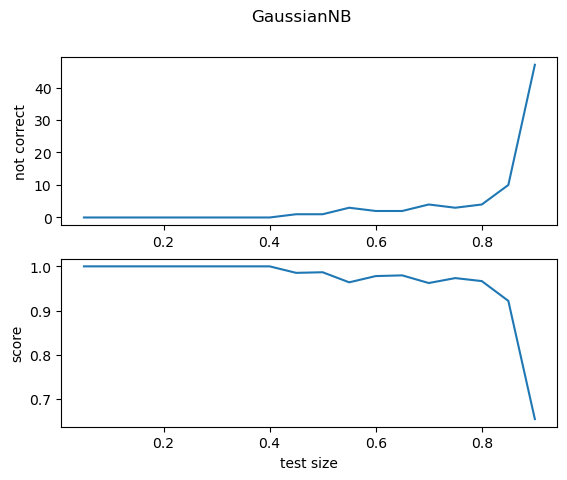

In [0]:
estimate_classification(GaussianNB())

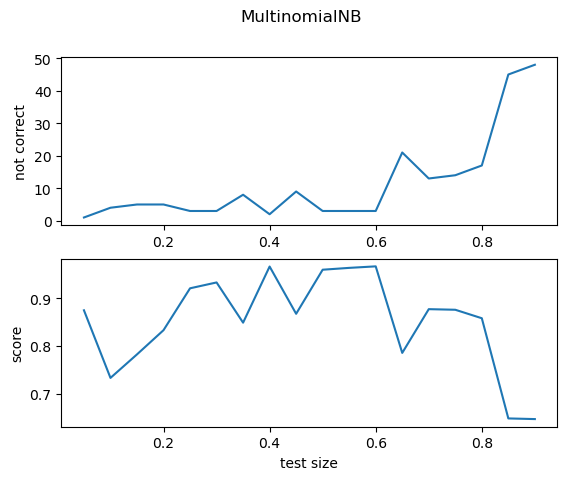

In [0]:
estimate_classification(MultinomialNB())

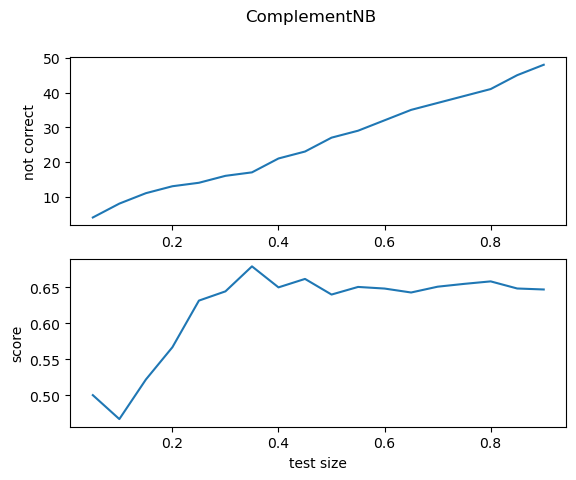

In [0]:
estimate_classification(ComplementNB())

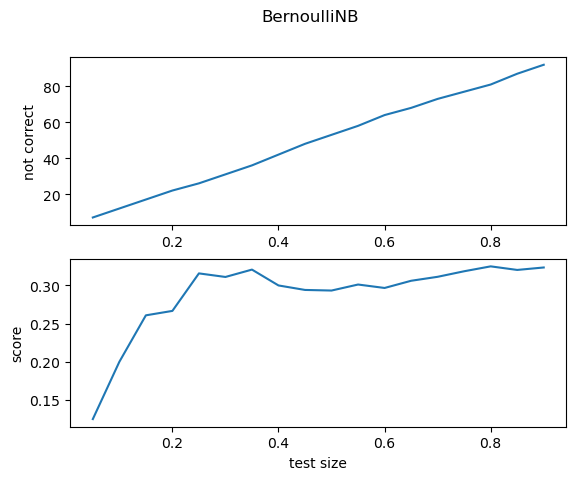

In [0]:
estimate_classification(BernoulliNB())

# Классифицирующие деревья

In [0]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

clf = tree.DecisionTreeClassifier()

y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())

5


In [0]:
clf.score(X_test, y_test)

0.9333333333333333

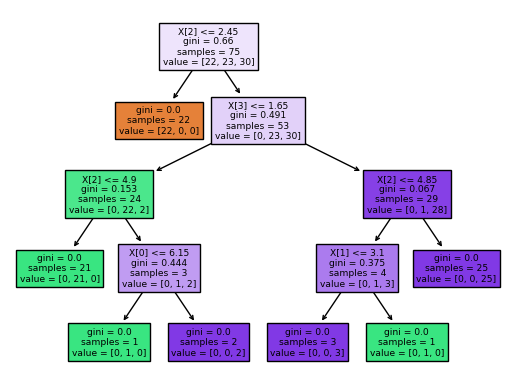

In [0]:
#plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True)
plt.show()

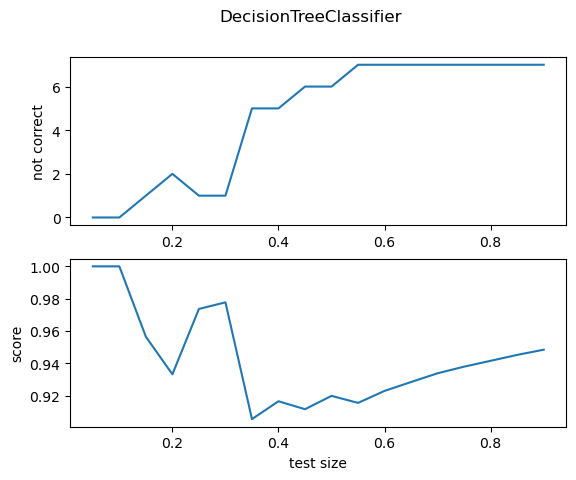

In [0]:
estimate_classification(tree.DecisionTreeClassifier())

# Линейный дискриминантный анализ

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())

3


In [0]:
clf.score(X_test, y_test)

0.96

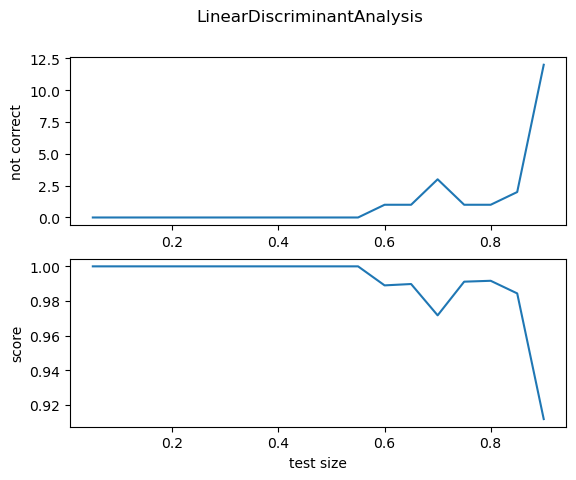

In [0]:
estimate_classification(LinearDiscriminantAnalysis())

4. Опишите для чего нужна функция transform? Примените ее, и визуализируйте
результаты

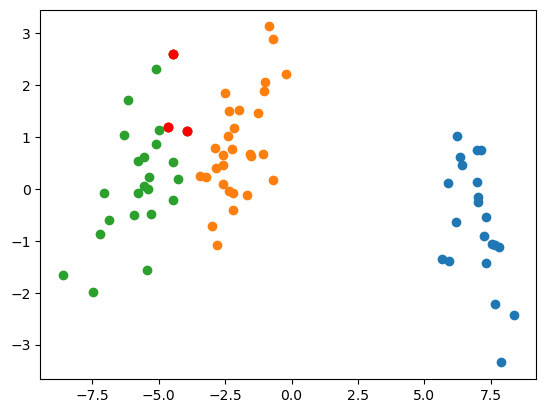

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
X_lda = clf.transform(X_test)

for i in range(len(set(y_test))):
    member = y_test == i
    plt.scatter(X_lda[member][:, 0], X_lda[member][:, 1])

    different = ((y_test == i) != (y_pred == i))
    plt.scatter(X_lda[different][:, 0], X_lda[different][:, 1], c='r')
    
plt.show()

6. Задайте априорную вероятность классу с номером 1 равную 0.7, остальным классам
задайте равные априорные вероятности. Как это сказалось на результате?

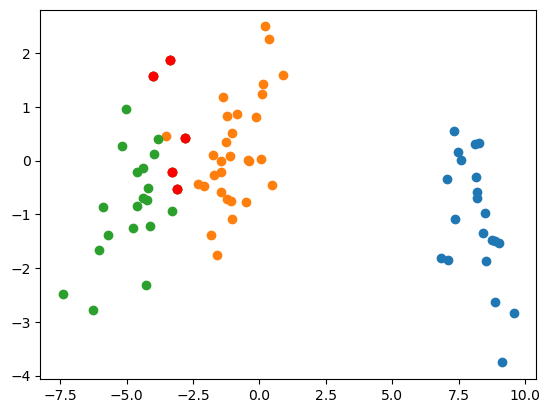

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

clf = LinearDiscriminantAnalysis(priors=[0.15, 0.7, 0.15])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
X_lda = clf.transform(X_test)

for i in range(len(set(y_test))):
    member = y_test == i
    plt.scatter(X_lda[member][:, 0], X_lda[member][:, 1])

    different = ((y_test == i) != (y_pred == i))
    plt.scatter(X_lda[different][:, 0], X_lda[different][:, 1], c='r')
    
plt.show()

In [0]:
from sklearn import svm

clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X, Y))

4
0.9533333333333334


In [0]:
print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

[[4.5 2.3 1.3 0.3]
 [5.4 3.9 1.7 0.4]
 [5.1 3.3 1.7 0.5]
 [5.  3.  1.6 0.2]
 [5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.7 2.9 4.2 1.3]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.6 3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [6.7 3.  5.  1.7]
 [5.5 2.4 3.7 1. ]
 [6.6 2.9 4.6 1.3]
 [5.6 3.  4.1 1.3]
 [5.9 3.2 4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [5.9 3.  5.1 1.8]
 [6.4 2.8 5.6 2.1]
 [6.5 3.2 5.1 2. ]
 [6.2 3.4 5.4 2.3]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [7.2 3.  5.8 1.6]
 [7.9 3.8 6.4 2. ]
 [6.  3.  4.8 1.8]
 [6.4 3.2 5.3 2.3]
 [6.7 3.  5.2 2.3]
 [5.8 2.7 5.1 1.9]
 [6.3 2.9 5.6 1.8]]
[16 26 36 59  2  4  6 33 34 37 40 42 54 57 58 60 64 65 66 67  1 11 14 17 19 20 23 41 44 55 56 62 71]
[ 4 16 13]


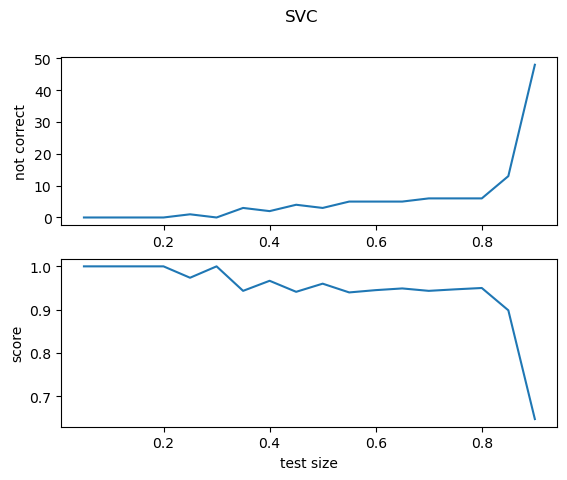

In [0]:
estimate_classification(svm.SVC())

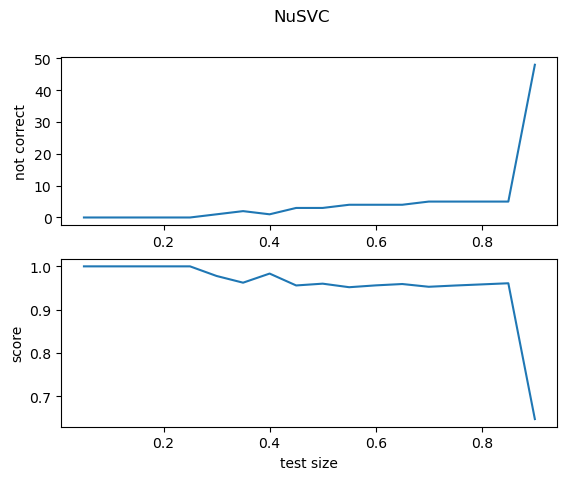

In [0]:
estimate_classification(svm.NuSVC())

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarni

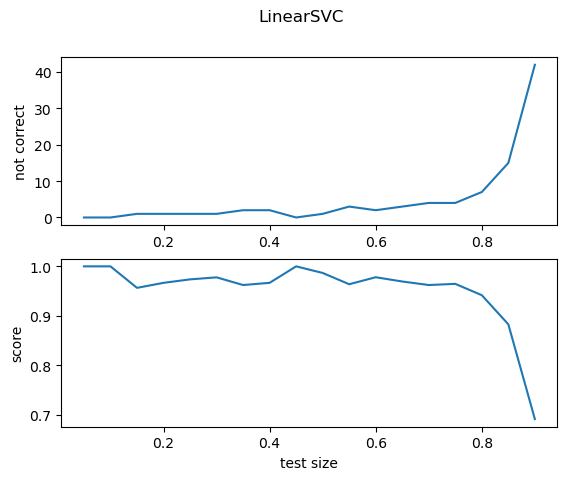

In [0]:
estimate_classification(svm.LinearSVC())